# Week 2 - Assignment

#### Roshana Mojtaba - 2050955
#### Attar Aidin - 2048654
#### Amjadi Bahador - 2040470
#### Joulaei Vijouyeh Roya - 2050954

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras,sklearn
import tensorflow as tf
import pandas as pd
import ast


from keras.models import Sequential
from keras.layers import Dropout, Dense, MaxPool1D, Conv1D
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

plt.rcParams['font.size'] = 14

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

%run nonlinear_function.py

Num GPUs Available:  0


## Exercise 1

In [4]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x)

x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
N_red = len(x_red)

x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
N_inc = len(x_inc)


#dim of a sample
L = len(x[0])
print('Regular set:', L)

L_red = len(x_red[0])
print('Reduced set:', L_red)

L_inc = len(x_inc[0])
print('Increased set:', L_inc)


N_train_red = int( perc_train * N_red )
N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')

Regular set: 2
Reduced set: 2
Increased set: 2
Regular data		: 4000			train		: 3200
Reduced data		: 2000			train		: 1600
Increased data		: 8000			train		: 6400


### Split training and test data

In [5]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [ ]:
(x_train_red, y_train_red) = (x_red[:N_train_red],y_red[:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))

Train: 1600 	 Validation: 400


In [ ]:
(x_train_inc, y_train_inc) = (x_inc[:N_train_inc],y_inc[:N_train_inc])
(x_valid_inc, y_valid_inc) = (x_inc[N_train_inc:],y_inc[N_train_inc:])
print("Train:",len(x_train_inc),"\t Validation:",len(x_valid_inc))

Train: 6400 	 Validation: 1600


In [ ]:
# Wrong! First divide and then augment
x_train_aug = np.zeros( shape = (x_train.shape[0] * 10, x_train.shape[1]) )
y_train_aug = np.zeros( shape =  y_train.shape[0] * 10 )
for i in range( x_train.shape[0] ):
    S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
    x_train_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
    y_train_aug[i*10:i*10+10] = y[i]
x_valid_aug, y_valid_aug = x_valid, y_valid

x_aug = np.concatenate( [x_train_aug, x_valid_aug] )
y_aug = np.concatenate( [y_train_aug, y_valid_aug] )

N_aug = len(x_aug)

N_train_aug = len(x_train_aug)
print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

L_aug = len(x_aug[0])
print('Augmented set:', L_inc)

print("Train:",len(x_train_aug),"\t Validation:",len(x_valid_aug))


Augmented data		: 32800			train		: 32000
Augmented set: 2
Train: 32000 	 Validation: 800


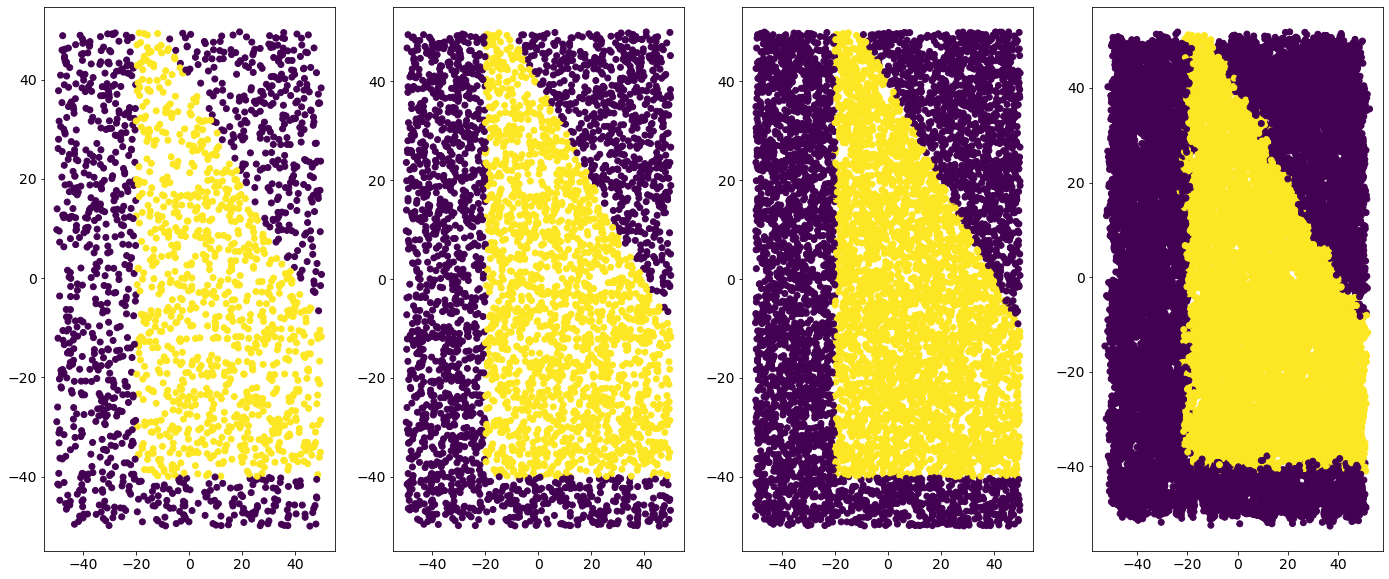

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (24,10))
ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax[1].scatter(x    [:,0],x    [:,1],c=y    )
ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

### Rescale input data

In [ ]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

In [ ]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_red.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 20)                60        
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_inc.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dropout(0.2)) #more stochastic
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='sigmoid'))
    model_aug.add(Dense(3, activation='sigmoid'))
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_aug.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 20)                60        
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [ ]:
model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model_aug.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

### Training

In [ ]:
fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=1)

Epoch 1/400
32/32 [==============================] - 1s 6ms/step - loss: 0.7101 - accuracy: 0.3231 - val_loss: 0.6897 - val_accuracy: 0.4225
Epoch 2/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.4938 - val_loss: 0.6628 - val_accuracy: 0.5300
Epoch 3/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.5225 - val_loss: 0.6401 - val_accuracy: 0.5300
Epoch 4/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.5731 - val_loss: 0.6184 - val_accuracy: 0.6450
Epoch 5/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6712 - val_loss: 0.5991 - val_accuracy: 0.6700
Epoch 6/400
32/32 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6913 - val_loss: 0.5822 - val_accuracy: 0.6950
Epoch 7/400
32/32 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7206 - val_loss: 0.5663 - val_accuracy: 0.7150
Epoch 8/400
3

In [ ]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=1)

Epoch 1/400
64/64 [==============================] - 1s 3ms/step - loss: 0.6481 - accuracy: 0.6513 - val_loss: 0.6204 - val_accuracy: 0.6612
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.6831 - val_loss: 0.5894 - val_accuracy: 0.6587
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.6753 - val_loss: 0.5607 - val_accuracy: 0.6075
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.6712 - val_loss: 0.5353 - val_accuracy: 0.6400
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.6928 - val_loss: 0.5152 - val_accuracy: 0.6662
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7122 - val_loss: 0.4977 - val_accuracy: 0.6787
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7216 - val_loss: 0.4802 - val_accuracy: 0.6913
Epoch 8/400
6

In [ ]:
fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=1)

Epoch 1/400
128/128 [==============================] - 1s 2ms/step - loss: 0.6359 - accuracy: 0.5753 - val_loss: 0.5815 - val_accuracy: 0.6781
Epoch 2/400
128/128 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7523 - val_loss: 0.4113 - val_accuracy: 0.8425
Epoch 3/400
128/128 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8562 - val_loss: 0.2971 - val_accuracy: 0.9038
Epoch 4/400
128/128 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8845 - val_loss: 0.2513 - val_accuracy: 0.9137
Epoch 5/400
128/128 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8978 - val_loss: 0.2284 - val_accuracy: 0.9269
Epoch 6/400
128/128 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9041 - val_loss: 0.2146 - val_accuracy: 0.9337
Epoch 7/400
128/128 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9131 - val_loss: 0.2045 - val_accuracy: 0.9388

In [ ]:
fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_aug,y_valid_aug),
                        verbose=1)

Epoch 1/400
640/640 [==============================] - 1s 2ms/step - loss: 0.5086 - accuracy: 0.7337 - val_loss: 0.3877 - val_accuracy: 0.8375
Epoch 2/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2778 - accuracy: 0.8861 - val_loss: 0.1983 - val_accuracy: 0.9287
Epoch 3/400
640/640 [==============================] - 1s 1ms/step - loss: 0.1970 - accuracy: 0.9219 - val_loss: 0.1583 - val_accuracy: 0.9450
Epoch 4/400
640/640 [==============================] - 1s 1ms/step - loss: 0.1746 - accuracy: 0.9291 - val_loss: 0.1460 - val_accuracy: 0.9413
Epoch 5/400
640/640 [==============================] - 1s 1ms/step - loss: 0.1652 - accuracy: 0.9322 - val_loss: 0.1353 - val_accuracy: 0.9488
Epoch 6/400
640/640 [==============================] - 1s 1ms/step - loss: 0.1568 - accuracy: 0.9370 - val_loss: 0.1239 - val_accuracy: 0.9550
Epoch 7/400
640/640 [==============================] - 1s 1ms/step - loss: 0.1519 - accuracy: 0.9383 - val_loss: 0.1226 - val_accuracy: 0.9525

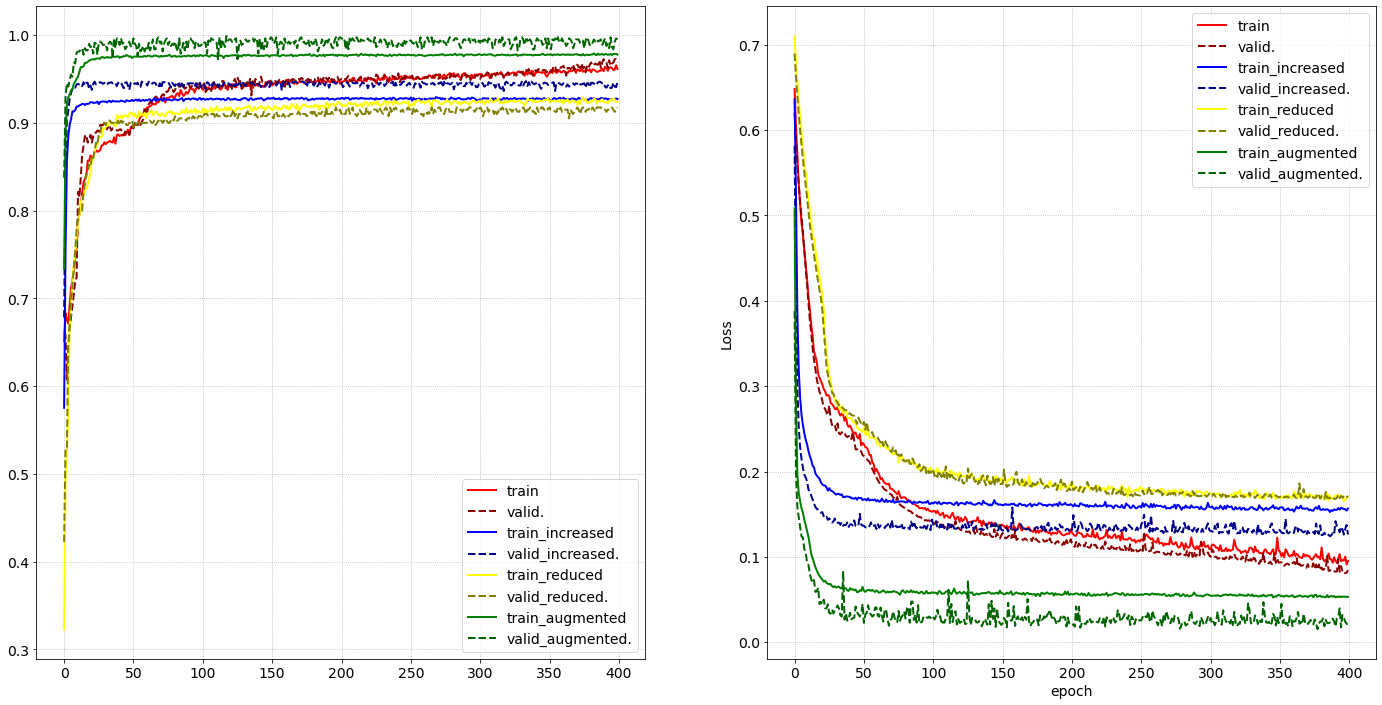

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history['accuracy'    ],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history['accuracy'    ],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history['accuracy'    ],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_accuracy'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history[    'loss'],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_loss'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history[    'loss'],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_loss'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history[    'loss'],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_loss'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


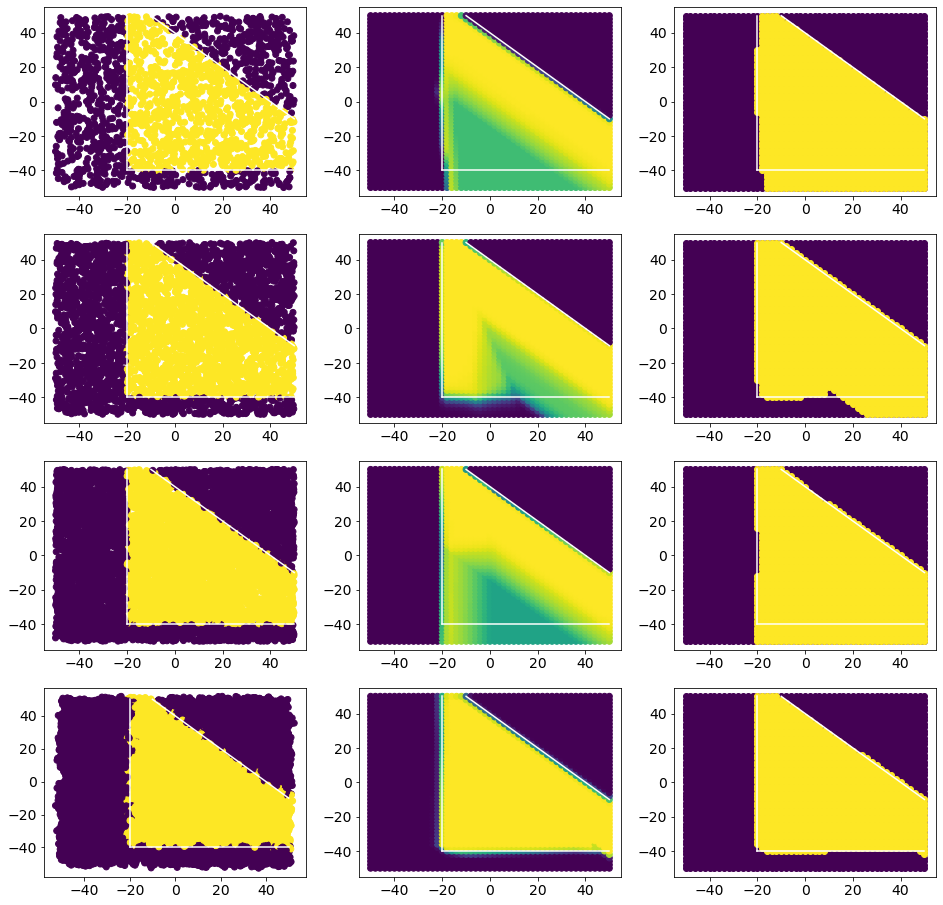

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

### Iterating the training multiple times to have better initial weights

In [ ]:
for i in range(10):
    fit_red = model_red.fit(x_train_red, y_train_red,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid_red,y_valid_red),
                            verbose=0)
    fit = model.fit(x_train, y_train,
                    epochs=nepoch, batch_size=50,
                    validation_data=(x_valid,y_valid),
                    verbose=0)
    fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid_inc,y_valid_inc),
                            verbose=0)
    fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid_aug,y_valid_aug),
                            verbose=0)
    print(i, 'done\n')

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

NameError: name 'np' is not defined

## Exercise 2

### Model definition

In [ ]:
def create_DNN(activation, dropout_rate, layers):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation = activation))
    for i in range(len(layers)):
        print(i)
        model.add(Dense(layers[i],activation = activation))
        print(i)
    print('ok')
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model

### Compilation of the model

In [ ]:
def compile_model(optimizer=tf.keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.2, layers = (20, 20)):
    # create the mode
    model=create_DNN(activation, dropout_rate, layers)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

### Grid search

Huge computation in next cell $\sim$3h

In [ ]:
'''# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#optimizer = ['SGD', 'Nadam']
# list of activation functions
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# list of dropout rates
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)
#param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=50, batch_size = 50, shuffle = True, verbose = 0)

results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('GridSearchResults.csv')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

'# call Keras scikit wrapper\nmodel_gridsearch = KerasClassifier(build_fn = compile_model)\n\n# list of allowed optional arguments for the optimizer, see `compile_model()`\noptimizer = [\'SGD\', \'RMSprop\', \'Adagrad\', \'Adadelta\', \'Adam\', \'Adamax\', \'Nadam\']\n#optimizer = [\'SGD\', \'Nadam\']\n# list of activation functions\nactivation = [\'softmax\', \'softplus\', \'softsign\', \'relu\', \'tanh\', \'sigmoid\', \'hard_sigmoid\', \'linear\']\n# list of dropout rates\ndropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]\n# define parameter dictionary\nparam_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)\n#param_grid = dict(optimizer=optimizer)\n# call scikit grid search module\ngrid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)\ngrid_result = grid.fit(x_train,y_train, epochs=50, batch_size = 50, shuffle = True, verbose = 0)\n\nresults = pd.DataFrame.from_dict(grid_result.cv_results_)\nresults.

In [ ]:
results = pd.read_csv('GridSearchResults.csv')
best_result = results[results["rank_test_score"] == 1]
best_result

activation_best = best_result.param_activation.values[0]
optimizer_best  = best_result.param_optimizer.values[0]

In [ ]:
'''model_gridsearch = KerasClassifier(build_fn = compile_model)

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
layers       = [(20,20), (30,30), (80,80), (20,30,20), (40)]
param_grid = dict(dropout_rate=dropout_rate, layers=layers)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=nepoch, batch_size = 50, shuffle = True, verbose = 0)

results_d = pd.DataFrame.from_dict(grid_result.cv_results_)
results_d.to_csv('GridSearchResults_DropoutRate.csv')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

'model_gridsearch = KerasClassifier(build_fn = compile_model)\n\ndropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]\nlayers       = [(20,20), (30,30), (80,80), (20,30,20), (40)]\nparam_grid = dict(dropout_rate=dropout_rate, layers=layers)\n\ngrid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)\ngrid_result = grid.fit(x_train,y_train, epochs=nepoch, batch_size = 50, shuffle = True, verbose = 0)\n\nresults_d = pd.DataFrame.from_dict(grid_result.cv_results_)\nresults_d.to_csv(\'GridSearchResults_DropoutRate.csv\')\n\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

In [ ]:
results_d     = pd.read_csv('GridSearchResults_DropoutRate.csv')
best_result_d = results_d[results_d["rank_test_score"] == 1]
best_result_d

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dropout_rate,param_layers,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,2,27.884795,0.196207,0.160749,0.007489,0.0,"(80, 80)","{'dropout_rate': 0.0, 'layers': (80, 80)}",0.97875,0.95625,0.9925,0.98875,0.979062,0.014097,1


0
0
1
1
ok
Epoch 1/400
64/64 [==============================] - 1s 4ms/step - loss: 0.6433 - accuracy: 0.5466 - val_loss: 0.5928 - val_accuracy: 0.6300
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.6947 - val_loss: 0.5344 - val_accuracy: 0.6800
Epoch 3/400
64/64 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7344 - val_loss: 0.5082 - val_accuracy: 0.6975
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7422 - val_loss: 0.4885 - val_accuracy: 0.7138
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7484 - val_loss: 0.4735 - val_accuracy: 0.7262
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7519 - val_loss: 0.4605 - val_accuracy: 0.7275
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7538 - val_loss: 0.4541 - val_accuracy: 0.7262
Ep

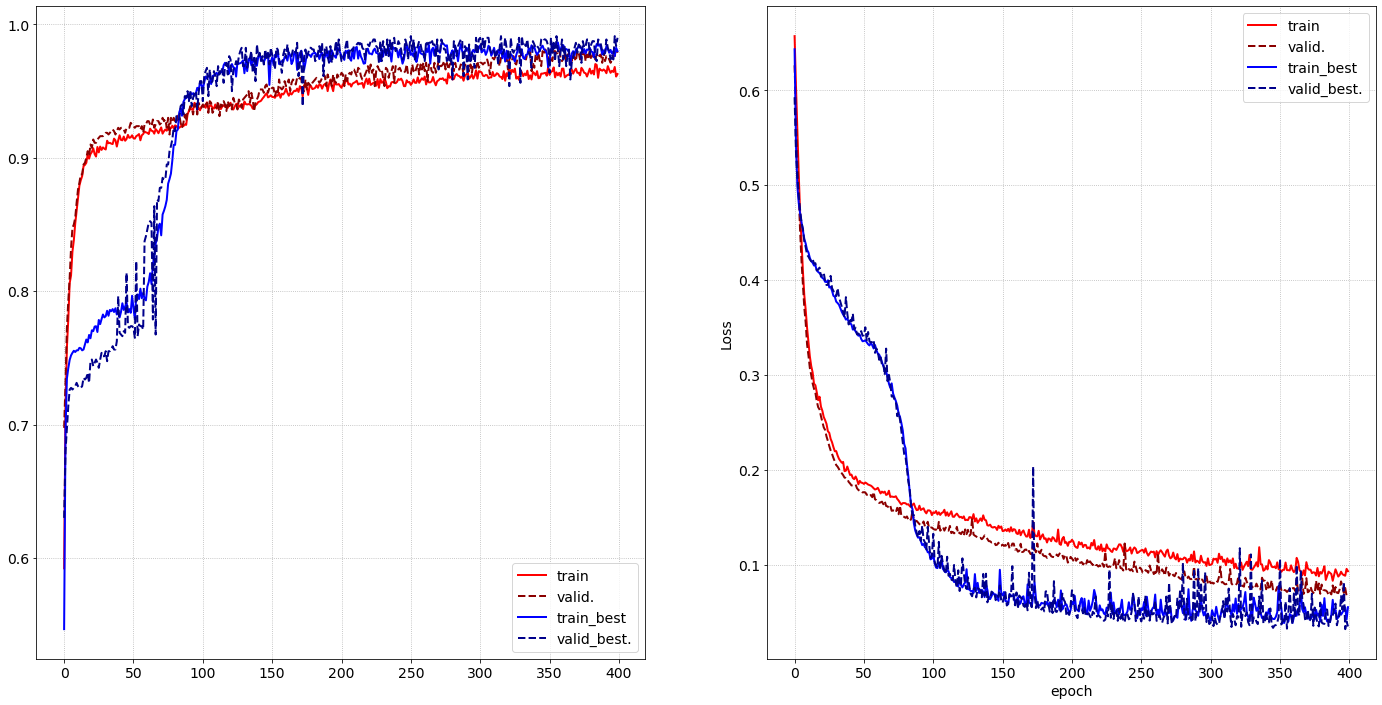

In [ ]:
dropout_best    = best_result_d.param_dropout_rate.values[0]
layers_best     = ast.literal_eval(best_result_d.param_layers.values[0])

model_best      = compile_model(optimizer_best ,activation_best, dropout_best, layers_best)
fit_best        = model_best.fit(x_train, y_train,
                                 epochs=nepoch, batch_size=50,
                                 validation_data=(x_valid,y_valid),
                                 verbose=1)

fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[     'accuracy'    ],label="train",       lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[     'val_accuracy'],label="valid.",      lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_best.history['accuracy'    ],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_best.history['val_accuracy'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[         'loss'],label="train",       lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[     'val_loss'],label="valid.",      lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_best.history[    'loss'],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_best.history['val_loss'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


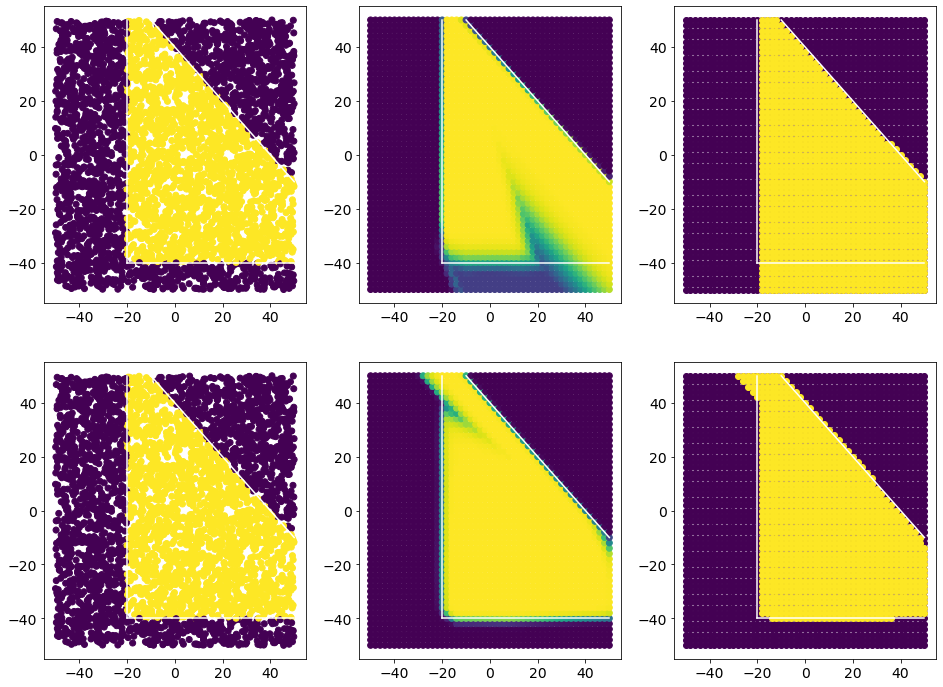

In [ ]:
pred_best = model_best.predict(grid_r)

def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(2,3,figsize=(16,12))
ax=AX[0,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[0,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred_best.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_best[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred_best>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

#### Best results with layers (80, 80), Adam optimizer, relu activation function and 0 of dropout rate.

### Trying Pooling algorithm

Epoch 1/400
64/64 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8881 - val_loss: 0.2334 - val_accuracy: 0.8850
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.8866 - val_loss: 0.2349 - val_accuracy: 0.8838
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.8875 - val_loss: 0.2435 - val_accuracy: 0.8813
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.8897 - val_loss: 0.2319 - val_accuracy: 0.8825
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.8884 - val_loss: 0.2386 - val_accuracy: 0.8788
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.8872 - val_loss: 0.2359 - val_accuracy: 0.8813
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.8900 - val_loss: 0.2360 - val_accuracy: 0.8813
Epoch 8/400
6

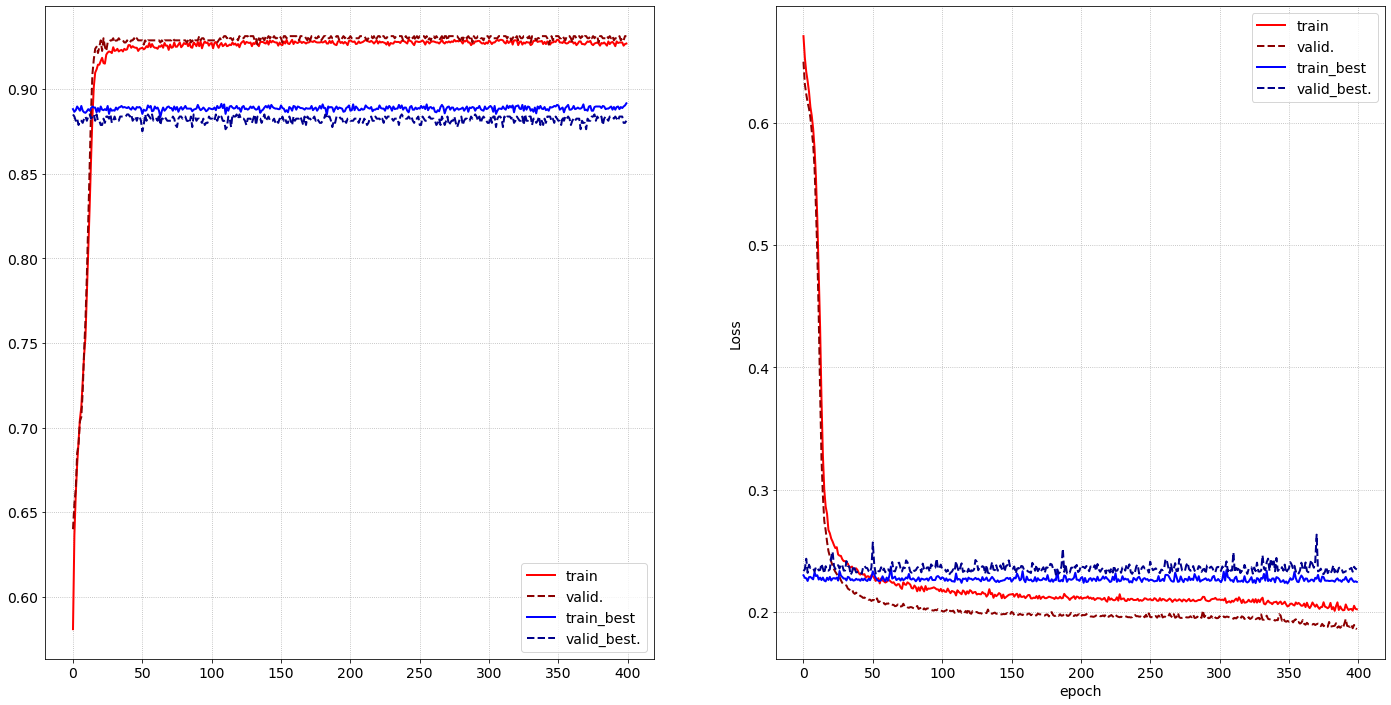

In [ ]:
"""("data"+str(j),TYPE)
("labels_data"+str(j),TYPE)

def create_DNN(activation, dropout_rate, layers):
    model = Sequential()
    model.add(Conv1D(40,32, strides=1, activation='relu',padding='causal',input_shape=(L,1)))
    model.add(Conv1D(20,10, strides=1, activation='relu',padding='causal'))
    model.add(Dropout(0.25))
    model.add(Conv1D(20,5, strides=1, activation='relu',padding='causal'))
    model.add(MaxPool1D(1))
    model.add(Dropout(0.25))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

def compile_model(optimizer=tf.keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.5, layers = (20, 20)):
    # create the mode
    model=create_DNN(activation, dropout_rate, layers)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


model_pool      = compile_model(optimizer_best ,activation_best, dropout_best, layers_best)
fit_pool        = model_best.fit(x_train, y_train,
                                 epochs=nepoch, batch_size=50,
                                 validation_data=(x_valid,y_valid),
                                 verbose=1)


fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[     'accuracy'    ],label="train",       lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[     'val_accuracy'],label="valid.",      lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_pool.history['accuracy'    ],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_pool.history['val_accuracy'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[         'loss'],label="train",       lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[     'val_loss'],label="valid.",      lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_pool.history[    'loss'],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_pool.history['val_loss'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()"""

## Exercise 3

In [ ]:
#Implementation of Different Scaling Functions

def create_DNN(activation, dropout_rate, layers):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation = activation, kernel_initializer='random_normal'))
    for i in range(len(layers)):
        model.add(Dense(layers[i],activation = activation, kernel_initializer='random_normal'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model

def compile_model(optimizer=tf.keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.2, layers = (20, 20)):
    # create the mode
    model=create_DNN(activation, dropout_rate, layers)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

def reg_scale(x):
    return x/50

def std_scale(x):
    return (x-x.mean())/np.sqrt(x.var())

def norm_scale(x):
    return (x - np.min(x, axis=0)) / np.abs(np.max(x, axis=0) - np.min(x, axis=0))

def log_scale(x): 
    x = x - np.min(x, axis=0) + 0.0000001 #shifting the data to be greater than 0
    return np.log10(x)

(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_train_reg     =  reg_scale(x_train)
x_valid_reg     =  reg_scale(x_valid)

x_train_std     =  std_scale(x_train)
x_valid_std     =  std_scale(x_valid)

x_train_norm     = norm_scale(x_train)
x_valid_norm     = norm_scale(x_valid)

x_train_log     =  log_scale(x_train)
x_valid_log     =  log_scale(x_valid)

# reproducibility
np.random.seed(12345)

CASE = 1
avg=40
nepoch=400

reg_loss_train, reg_loss_val, log_loss_train=[],[],[]
log_loss_val, norm_loss_train=[],[]
norm_loss_val, std_loss_train, std_loss_val = [],[],[]
reg_acc_train, reg_acc_val = [],[]
log_acc_train, log_acc_val, norm_acc_train= [],[],[]
norm_acc_val, std_acc_train, std_acc_val=[],[], []

for i in range(avg):
# regular set with random initial weights
    
    model = KerasClassifier(build_fn = compile_model)

    fit_reg  =  model.fit(x_train_reg, y_train,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_reg,y_valid),
                        verbose=0)
    fit_norm =  model.fit(x_train_norm,  y_train,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_norm,y_valid),
                        verbose=0)
    fit_log  =  model.fit(x_train_log,  y_train,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_log,y_valid),
                        verbose=0)
    fit_std  =  model.fit(x_train_std,  y_train,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_std,y_valid),
                        verbose=0)

    reg_loss_train .append(fit_reg.history[    'loss'    ])
    reg_loss_val   .append(fit_reg.history[    'val_loss'    ])
    log_loss_train .append(fit_log.history[    'loss'    ])
    log_loss_val   .append(fit_log.history[    'val_loss'    ])
    norm_loss_train.append(fit_norm.history[    'loss'    ])
    norm_loss_val  .append(fit_norm.history[    'val_loss'    ])
    std_loss_train .append(fit_std.history[    'loss'    ])
    std_loss_val   .append(fit_std.history[    'val_loss'    ])

    reg_acc_train  .append(fit_reg.history[    'accuracy'    ])
    reg_acc_val    .append(fit_reg.history[    'val_accuracy'    ])
    log_acc_train  .append(fit_log.history[    'accuracy'    ])
    log_acc_val    .append(fit_log.history[    'val_accuracy'    ])
    norm_acc_train .append(fit_norm.history[    'accuracy'    ])
    norm_acc_val   .append(fit_norm.history[  'val_accuracy'    ])
    std_acc_train  .append(fit_std.history[    'accuracy'    ])
    std_acc_val    .append(fit_std.history[    'val_accuracy'    ])

reg_loss_train_avg= np.mean(reg_loss_train, axis=0)
reg_loss_val_avg=   np.mean(reg_loss_val, axis=0)
log_loss_train_avg= np.mean(log_loss_train, axis=0)
log_loss_val_avg=   np.mean(log_loss_val, axis=0)
std_loss_train_avg= np.mean(std_loss_train, axis=0)
std_loss_val_avg=   np.mean(std_loss_val, axis=0)
norm_loss_train_avg=np.mean(norm_loss_train, axis=0)
norm_loss_val_avg=  np.mean(norm_loss_val, axis=0)

reg_acc_train_avg=  np.mean(reg_acc_train, axis=0)
reg_acc_val_avg=    np.mean(reg_acc_val, axis=0)
log_acc_train_avg=  np.mean(log_acc_train, axis=0)
log_acc_val_avg=    np.mean(log_acc_val, axis=0)
std_acc_train_avg=  np.mean(std_acc_train, axis=0)
std_acc_val_avg=    np.mean(std_acc_val, axis=0)
norm_acc_train_avg= np.mean(norm_acc_train, axis=0)
norm_acc_val_avg=   np.mean(norm_acc_val, axis=0)

results_fits = pd.DataFrame({
    
    'loss_validation':  np.concatenate([
        reg_loss_val_avg,
        log_loss_val_avg,
        std_loss_val_avg,
        norm_loss_val_avg,]),
    'loss_training':  np.concatenate([
        reg_loss_train_avg,
        log_loss_train_avg,
        std_loss_train_avg,
        norm_loss_train_avg,]),
    'acc_validation':  np.concatenate([
        reg_acc_val_avg,
        log_acc_val_avg,
        std_acc_val_avg,
        norm_acc_val_avg,]),
    'acc_training':  np.concatenate([
        reg_acc_train_avg,
        log_acc_train_avg,
        std_acc_train_avg,
        norm_acc_train_avg,]),
        })

results_fits.to_csv('scale_fun.csv')

Train: 3200 	 Validation: 800
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:67: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
#reading saved data
#results_fits.read_csv('scale_fun.csv')

In [2]:
fig,AX=plt.subplots(1,2,figsize=(20,10))
ax=AX[0]
ax.plot(reg_acc_train_avg, label="train_reg",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(reg_acc_val_avg,   label="valid_reg",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(log_acc_train_avg, label="train_log",            lw = 2, ls = 'solid' , c = 'green')
ax.plot(log_acc_val_avg,   label="valid_log",           lw = 2, ls = 'dashed', c = 'darkgreen')
ax.plot(std_acc_train_avg ,label="train_std",           lw = 2, ls = 'solid' , c = 'blue')
ax.plot(std_acc_val_avg,   label="valid_std",          lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(norm_acc_train_avg,label="train_norm",            lw = 2, ls = 'solid' , c = 'orange')
ax.plot(norm_acc_val_avg,  label="valid_norm",           lw = 2, ls = 'dashed', c = 'darkorange')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy")
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(reg_loss_train_avg,label="train_reg",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(reg_loss_val_avg,label="valid._reg",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(log_loss_train_avg,label="train_log",            lw = 2, ls = 'solid' , c = 'green')
ax.plot(log_loss_val_avg,label="valid._log",           lw = 2, ls = 'dashed', c = 'darkgreen')
ax.plot(std_loss_train_avg,label="train_std",           lw = 2, ls = 'solid' , c = 'blue')
ax.plot(std_loss_val_avg,label="valid._std",          lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(norm_loss_train_avg,label="train_norm",            lw = 2, ls = 'solid' , c = 'orange')
ax.plot(norm_loss_val_avg,label="valid._norm",           lw = 2, ls = 'dashed', c = 'darkorange')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.set_title("Loss")
ax.legend()
ax.grid(ls='dotted')

# fig.suptitle('Using Different Scaling Functions', fontsize=16)
plt.show()


NameError: name 'plt' is not defined

In [1]:
#Implementation of Different Initial Weights

def Z_scale(x):
    return (x-x.mean())/np.sqrt(x.var())

(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_train     = Z_scale(x_train)
x_valid     = Z_scale(x_valid)

# reproducibility
np.random.seed(12345)

CASE = 1
def create_DNN(kernel_initializer):
    if CASE==1:
        model = Sequential()
        model.add(Dense(L,input_shape=(L,), activation='relu', kernel_initializer= kernel_initializer))
        model.add(Dense(20, activation='relu', kernel_initializer= kernel_initializer))
        model.add(Dense(20, activation='relu', kernel_initializer= kernel_initializer))
        model.add(Dropout(0.2)) #more stochastic
        model.add(Dense(1, activation='sigmoid'))
        nepoch=200
    if CASE==2:
        model = Sequential()
        model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        nepoch=200
    return model
# print(model.summary())

def compile_model(kernel_initializer):
    # create the mode
    model=create_DNN(kernel_initializer)
    # compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

RN_loss_train, RN_loss_val, RU_loss_train=[],[],[]
RU_loss_val,   Z_loss_train=[],[]
Z_loss_val,    O_loss_train, O_loss_val = [],[],[]
RN_acc_train,  RN_acc_val = [],[]
RU_acc_train,  RU_acc_val, Z_acc_train= [],[],[]
Z_acc_val,     O_acc_train, O_acc_val=[],[], []

nepoch=400
avg=20

for i in range(avg):
    
    model_RN    =  compile_model('random_normal')
    model_RU    =  compile_model('random_uniform')
    model_Zeros =  compile_model('GlorotNormal')
    model_Ones  =  compile_model('GlorotUniform')
    
    model = KerasClassifier(build_fn = compile_model)
    fit_RN = model_RN.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=0)
    fit_RU = model_RU.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=0)
    fit_Z  = model_Zeros.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=0)
    fit_O  = model_Ones.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=0)

    RN_loss_train.append(fit_RN.history[ 'loss'    ])
    RN_loss_val  .append(fit_RN.history[ 'val_loss'    ])
    RU_loss_train.append(fit_RU.history[ 'loss'    ])
    RU_loss_val  .append(fit_RU.history[ 'val_loss'    ])
    Z_loss_train .append(fit_Z.history [ 'loss'    ])
    Z_loss_val   .append(fit_Z.history [ 'val_loss'    ])
    O_loss_train .append(fit_O.history [ 'loss'    ])
    O_loss_val   .append(fit_O.history [ 'val_loss'    ])

    RN_acc_train .append(fit_RN.history[ 'accuracy'    ])
    RN_acc_val   .append(fit_RN.history[ 'val_accuracy'    ])
    RU_acc_train .append(fit_RU.history[ 'accuracy'    ])
    RU_acc_val   .append(fit_RU.history[ 'val_accuracy'    ])
    Z_acc_train  .append(fit_Z.history [ 'accuracy'    ])
    Z_acc_val    .append(fit_Z.history [ 'val_accuracy'    ])
    O_acc_train  .append(fit_O.history [ 'accuracy'    ])
    O_acc_val    .append(fit_O.history [ 'val_accuracy'    ])

RN_loss_train_avg= np.mean(RN_loss_train, axis=0)
RN_loss_val_avg=   np.mean(RN_loss_val, axis=0)
RU_loss_train_avg= np.mean(RU_loss_train, axis=0)
RU_loss_val_avg=   np.mean(RU_loss_val, axis=0)
Z_loss_train_avg=  np.mean(Z_loss_train, axis=0)
Z_loss_val_avg=    np.mean(Z_loss_val, axis=0)
O_loss_train_avg=  np.mean(O_loss_train, axis=0)
O_loss_val_avg=    np.mean(O_loss_val, axis=0)

RN_acc_train_avg=  np.mean(RN_acc_train, axis=0)
RN_acc_val_avg=    np.mean(RN_acc_val, axis=0)
RU_acc_train_avg=  np.mean(RU_acc_train, axis=0)
RU_acc_val_avg=    np.mean(RU_acc_val, axis=0)
Z_acc_train_avg=   np.mean(Z_acc_train, axis=0)
Z_acc_val_avg=     np.mean(Z_acc_val, axis=0)
O_acc_train_avg=   np.mean(O_acc_train, axis=0)
O_acc_val_avg=     np.mean(O_acc_val, axis=0)

results_fits = pd.DataFrame({
    'loss_validation':  np.concatenate([
        RN_loss_val_avg,
        RU_loss_val_avg,
        Z_loss_val_avg,
        O_loss_val_avg,]),
    'loss_training':  np.concatenate([
        RN_loss_train_avg,
        RU_loss_train_avg,
        Z_loss_train_avg,
        O_loss_train_avg,]),
    'acc_training':  np.concatenate([
        RN_acc_train_avg,
        RU_acc_train_avg,
        Z_acc_train_avg,
        O_acc_train_avg,]),
    'acc_valididation':  np.concatenate([
        RN_acc_val_avg,
        RU_acc_val_avg,
        Z_acc_val_avg,
        O_acc_val_avg,]),
        })
        
results_fits.to_csv('initializer.csv')

Train: 3200 	 Validation: 800
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:61: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
#reading saved data
#results_fits.read_csv('initializer.csv')

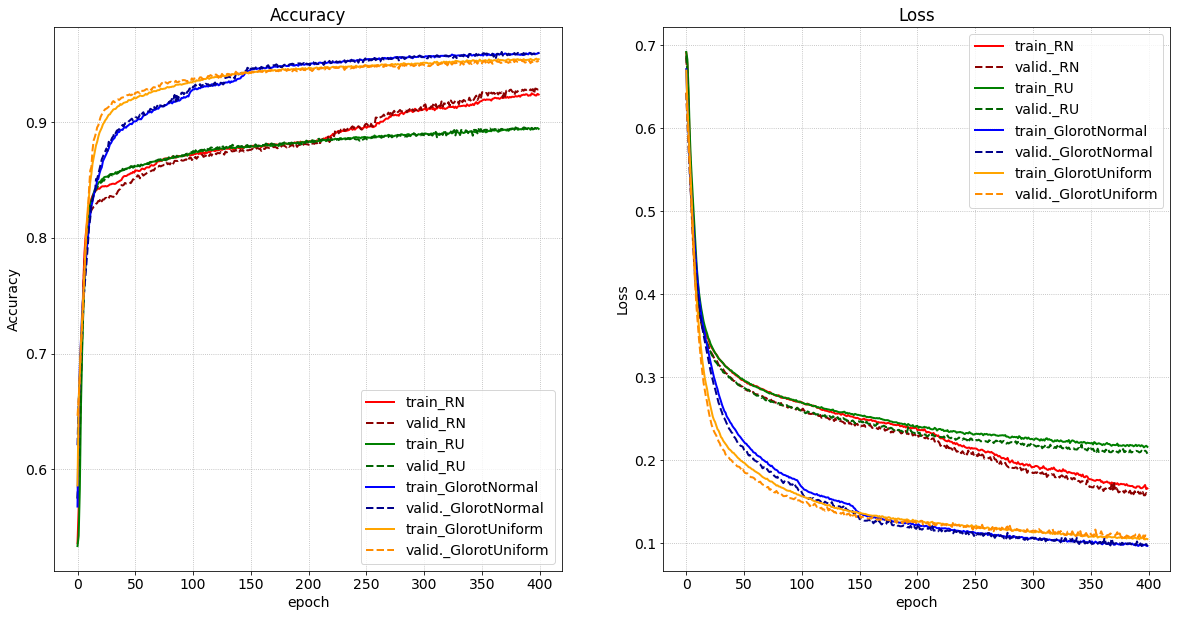

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(20,10))
ax=AX[0]
ax.plot(RN_acc_train_avg, label="train_RN",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(RN_acc_val_avg,   label="valid_RN",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(RU_acc_train_avg, label="train_RU",            lw = 2, ls = 'solid' , c = 'green')
ax.plot(RU_acc_val_avg,   label="valid_RU",           lw = 2, ls = 'dashed', c = 'darkgreen')
ax.plot(Z_acc_train_avg ,label="train_GlorotNormal",           lw = 2, ls = 'solid' , c = 'blue')
ax.plot(Z_acc_val_avg,   label="valid._GlorotNormal",          lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(O_acc_train_avg,label="train_GlorotUniform",            lw = 2, ls = 'solid' , c = 'orange')
ax.plot(O_acc_val_avg,  label="valid._GlorotUniform",           lw = 2, ls = 'dashed', c = 'darkorange')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy")
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(RN_loss_train_avg,label="train_RN",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(RN_loss_val_avg,label="valid._RN",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(RU_loss_train_avg,label="train_RU",            lw = 2, ls = 'solid' , c = 'green')
ax.plot(RU_loss_val_avg,label="valid._RU",           lw = 2, ls = 'dashed', c = 'darkgreen')
ax.plot(Z_loss_train_avg,label="train_GlorotNormal",           lw = 2, ls = 'solid' , c = 'blue')
ax.plot(Z_loss_val_avg,label="valid._GlorotNormal",          lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(O_loss_train_avg,label="train_GlorotUniform",            lw = 2, ls = 'solid' , c = 'orange')
ax.plot(O_loss_val_avg,label="valid._GlorotUniform",           lw = 2, ls = 'dashed', c = 'darkorange')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.set_title("Loss")
ax.legend()
ax.grid(ls='dotted')

# fig.suptitle('Using Different Scaling Functions', fontsize=16)
plt.show()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))

# RESCALE
#grid_r = grid/50
grid_r = grid.copy()
print(grid[:,1])
for i in range( grid.shape[0] ):
    grid_r[i,:] = (grid[i,0]/np.sqrt(grid[:,0].var()), grid[i,1]/np.sqrt(grid[:,1].var()))

pred     = model.predict    (grid_r)

51 2601
[-50. -50. -50. ...  50.  50.  50.]


(2601, 2) (2601, 1)


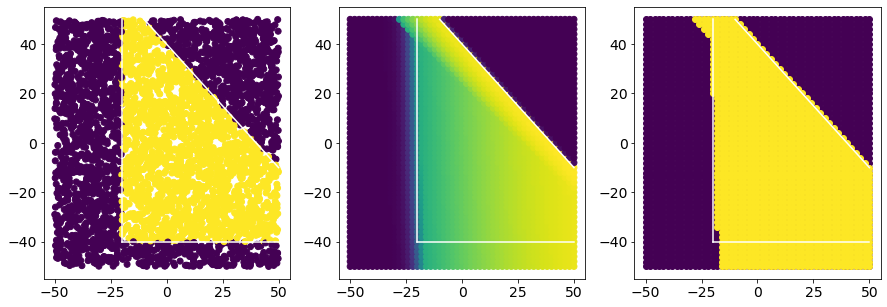

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")

fig, AX = plt.subplots(ncols=3, figsize=(15, 5))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

## Exercise 4

In [ ]:
#%run nonlinear_function.py

Regular set: 2


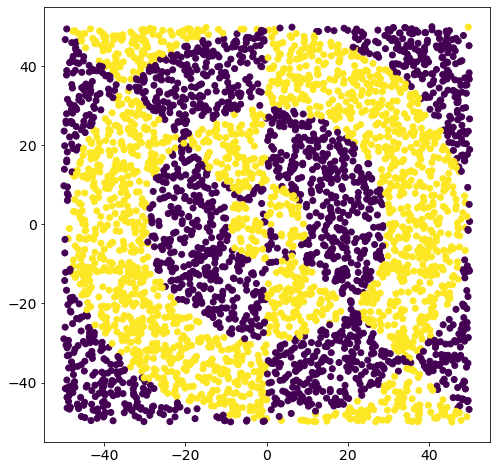

In [ ]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 2
x_diff = np.loadtxt(filename('diff_data', TYPE), delimiter=' ')
y_diff = np.loadtxt(filename('labels_diff_data', TYPE), delimiter=' ')
N = len(x_diff)

# x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
# y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
# N_red = len(x_red)

# x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
# y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
# N_inc = len(x_inc)

# x_aug = np.zeros( shape = (x.shape[0] * 10, x.shape[1]) )
# y_aug = np.zeros( shape = y.shape[0] * 10 )
# for i in range( x.shape[0] ):
#     S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
#     x_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
#     y_aug[i*10:i*10+10] = y[i]
# N_aug = len(x_aug)

#dim of a sample
L = len(x_diff[0])
print('Regular set:', L)

# L_red = len(x_red[0])
# print('Reduced set:', L_red)

# L_inc = len(x_inc[0])
# print('Increased set:', L_inc)

# L_aug = len(x_aug[0])
# print('Augmented set:', L_inc)


# N_train_red = int( perc_train * N_red )
# N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
# N_train_aug = int( perc_train * N_aug )
# print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
# print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
# print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')
# print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

fig, ax = plt.subplots(figsize = (8,8))
# ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax.scatter(x_diff    [:,0],x_diff    [:,1],c=y_diff    )
# ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
# ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

In [ ]:
(x_train, y_train) = (x_diff[:N_train],y_diff[:N_train])
(x_valid, y_valid) = (x_diff[N_train:],y_diff[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [ ]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

In [ ]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_284 (Dense)           (None, 2)                 6         
                                                                 
 dense_285 (Dense)           (None, 10)                30        
                                                                 
 dense_286 (Dense)           (None, 10)                110       
                                                                 
 dropout_71 (Dropout)        (None, 10)                0         
                                                                 
 dense_287 (Dense)           (None, 10)                110       
                                                                 
 dense_288 (Dense)           (None, 10)                110       
                                                                 
 dropout_72 (Dropout)        (None, 10)              

In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6928 - accuracy: 0.5250 - val_loss: 0.6927 - val_accuracy: 0.4988 - 850ms/epoch - 13ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6920 - accuracy: 0.5116 - val_loss: 0.6925 - val_accuracy: 0.5050 - 130ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6917 - accuracy: 0.5188 - val_loss: 0.6923 - val_accuracy: 0.5075 - 135ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.6909 - accuracy: 0.5222 - val_loss: 0.6924 - val_accuracy: 0.5000 - 143ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.6900 - accuracy: 0.5234 - val_loss: 0.6925 - val_accuracy: 0.5050 - 146ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.6900 - accuracy: 0.5316 - val_loss: 0.6926 - val_accuracy: 0.5038 - 175ms/epoch - 3ms/step
Epoch 7/400
64/64 - 0s - loss: 0.6882 - accuracy: 0.5350 - val_loss: 0.6918 - val_accuracy: 0.5038 - 157ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.6887 - accuracy: 0.5378 - val_loss: 0.6920 - val_accuracy: 0.5088 - 137ms/epoch - 2ms/step
Epoch 9

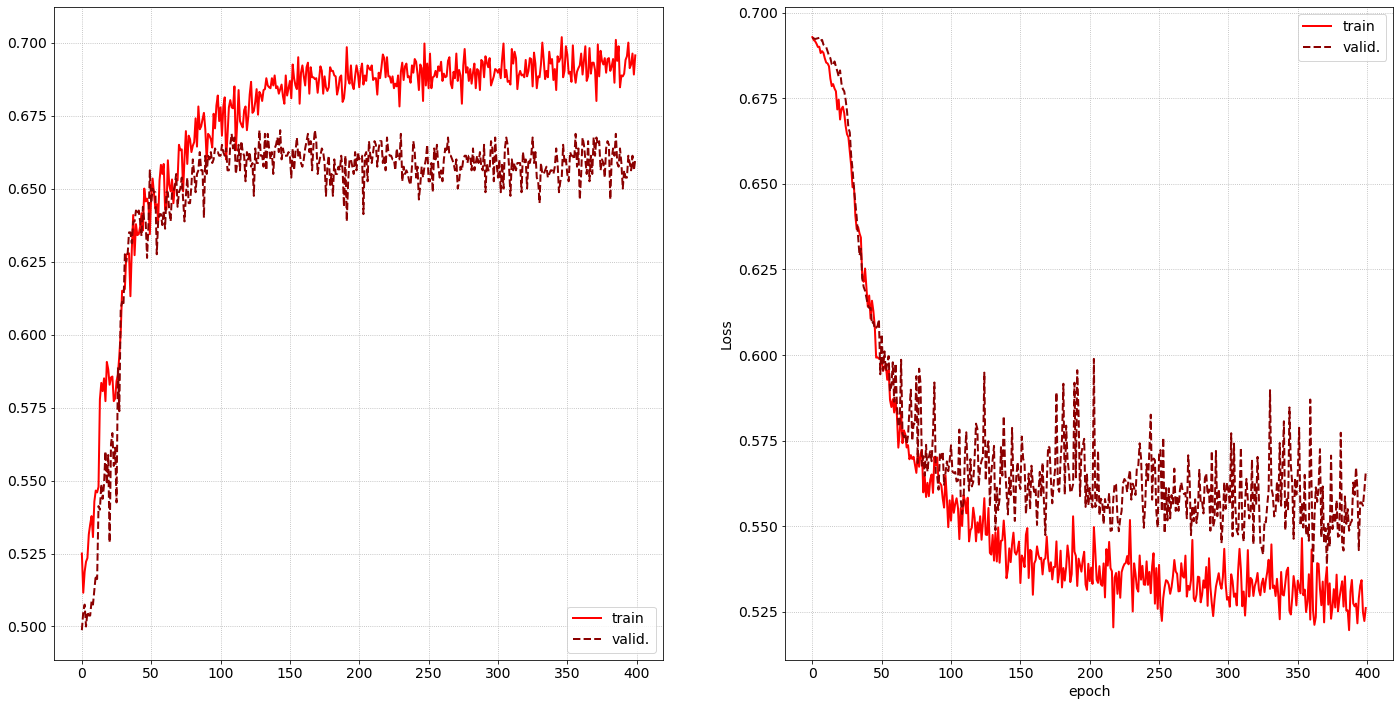

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]


NameError: name 'model_red' is not defined

(2601, 2) (2601, 1)


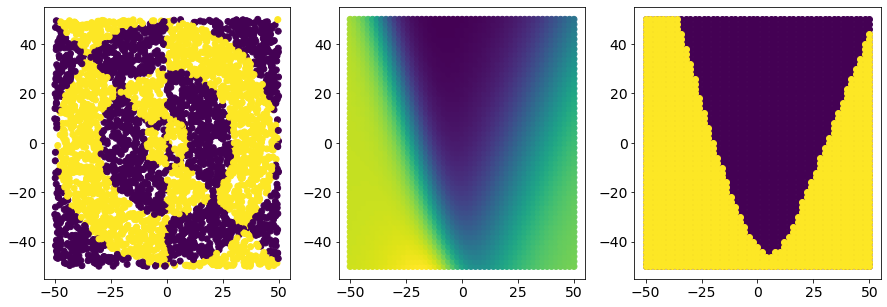

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig, AX = plt.subplots(ncols=3, figsize=(15, 5))
ax=AX[0]
ax.scatter(x_diff[:,0],x_diff[:,1],c=y_diff)
#boundaries()
ax=AX[1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
#boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
#boundaries()

plt.show()

# ax=AX[1,0]
# ax.scatter(x[:,0],x[:,1],c=y)
# boundaries()
# ax=AX[1,1]
# print(grid.shape, pred.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
# boundaries()
# ax=AX[1,2]
# W1=np.where(pred>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

# ax=AX[2,0]
# ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
# boundaries()
# ax=AX[2,1]
# print(grid.shape, pred_inc.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
# boundaries()
# ax=AX[2,2]
# W1=np.where(pred_inc>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

# ax=AX[3,0]
# ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
# boundaries()
# ax=AX[3,1]
# print(grid.shape, pred_aug.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
# boundaries()
# ax=AX[3,2]
# W1=np.where(pred_aug>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cb9264e-65a5-431d-a980-16667908489e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>